In [1]:
%matplotlib inline

#plt.figure(figsize=(30,30))
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
# Jack's car rental policy iteration


In [15]:
def PR(c1, c2):
    pssa = 0.0
    rssa = 0.0
    if c1 > c2:
        for i in range(c2+1):
            pi = poisson.pmf(c1-c2+i, dec_mu1) * poisson.pmf(i, inc_mu1)
            pssa += pi
            rssa += poisson.pmf(c1-c2+i, dec_mu1) * (sale_reward*(c1-c2+i))
    else:
        for i in range(c1+1):
            pi = poisson.pmf(i, dec_mu1) * poisson.pmf(c2-c1+i, inc_mu1)
            pssa += pi
            rssa += poisson.pmf(i, dec_mu1) *(sale_reward*i)
    return pssa, rssa

def Q(s, a, s_next):
    s_start = (s[0] - a, s[1] + a)
    c1, c2 = s_start
    c1n, c2n = s_next
    pssa = 0.0
    rssa = 0.0
    #print c1, c2, c1n, c2n, value_s[s_next]
    if (c1, c1n, a, 0) in Qcache:
        pssa, rssa = Qcache[(c1, c1n, a, 0)]
    else:
        pssa, rssa = PR(c1, c1n)
        Qcache[(c1, c1n, a, 0)] = (pssa, rssa)
    
    if (c2, c2n, a, 1) in Qcache:
        p, r= Qcache[(c2, c2n, a, 1)]
        pssa *= p
        rssa += r
    else:
        p, r = PR(c2, c2n)
        pssa *= p
        rssa += r
        Qcache[(c2, c2n, a, 1)] = (pssa, rssa)
    ret = pssa *(rssa - drive_cost * abs(a) + discount * value_s[s_next])
    return ret

In [16]:
def Qa(s, a):
    qa = 0
    for s_next in value_s:
        qa += Q(s, a, s_next)
    return qa

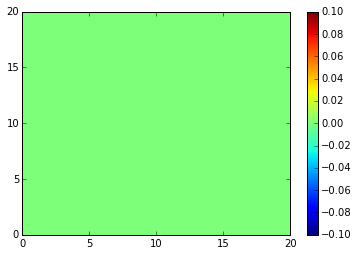

count= 5  delta= 6.71962486454e-06


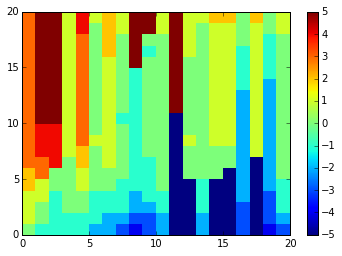

count= 4  delta= 3.88229817911e-05


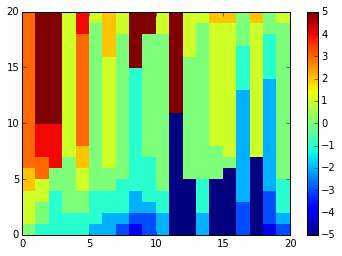

count= 3  delta= 2.6675757363e-05


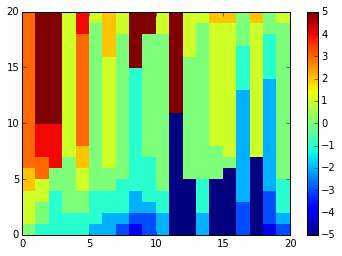

In [22]:
def update(s):
    act = actions[s]
    return Qa(s, act)

def best_act(s):
    acts = avail_actions[s]
    max_acts = actions[s]
    max_act_value = Qa(s, max_acts)
    for a in acts:
        av = Qa(s, a)
        if av > max_act_value:
            max_act_value = av
            max_acts = a
    return max_acts

def policy_eval():
    # step 2 Policy Evaluation
    delta = 1
    count = 0
    while (delta > theta):
        delta = 0
        count += 1
        for s in value_s:
            tmp = value_s[s]
            value_s[s] = update(s)
            if delta < abs(tmp - value_s[s]):
                delta = abs(tmp - value_s[s])
    print "count=", count, " delta=", delta

def policy_improvement():
    stable = True
    for s in actions:
        tmp = best_act(s)
        if  tmp != actions[s]:
            stable = False
            actions[s] = tmp
            #print 'policy change for ', s, ' action:', actions[s], '->', max_
    return stable

def show_policy():
    ac = np.zeros((max_cars, max_cars))
    for i in range(max_cars):
        for j in range(max_cars):
            ac[i,j] = actions[(i,j)]
    plt.subplot(1,1,1)
    c = plt.pcolor(ac)
    plt.colorbar()
    plt.show()

max_cars = 20
max_change = 5
sale_reward = 10
drive_cost = 2
dec_mu1 = 3
inc_mu1 = 3
dec_mu2 = 4
inc_mu2 = 2
value_s = {}
discount = 0.9
actions = {}
avail_actions = {}
for i in range(max_cars):
    for j in range(max_cars):
        value_s[(i,j)] = 0.0
        # actions is to move from location 1 to location 2. negative means from 2 to 1.
        avail_actions[(i,j)] = [x for x in range(i, -j-1, -1) if x<=5 and x >=-5
                              and i-x <= max_cars+max_change and -j-x >= -max_cars-max_change]
        actions[(i, j)] = 0
Qcache = {}
theta = 0.0001
stable = False
show_policy()
while not stable:
    policy_eval()
    stable = policy_improvement()
    show_policy()

#print actions

In [23]:
value_s

{(0, 0): 0.0043047924961483507,
 (0, 1): 0.011447958420747415,
 (0, 2): 0.041487419950034042,
 (0, 3): 0.20930885669006818,
 (0, 4): 0.22036392984377975,
 (0, 5): 0.61696294288635345,
 (0, 6): 0.95744296850183241,
 (0, 7): 1.0121796756688723,
 (0, 8): 2.4263827014495898,
 (0, 9): 2.2238943293841684,
 (0, 10): 0.95647807174973798,
 (0, 11): 3.809899319731834,
 (0, 12): 3.868471552729674,
 (0, 13): 0.71042879498303235,
 (0, 14): 5.225018875464305,
 (0, 15): 5.022210711689695,
 (0, 16): 3.2345419267755546,
 (0, 17): 2.4493921377016323,
 (0, 18): 3.2025019127533527,
 (0, 19): 0.58796464825514949,
 (1, 0): 0.019924260553299131,
 (1, 1): 0.044929443256593843,
 (1, 2): 0.1068948112001529,
 (1, 3): 0.5017214874869097,
 (1, 4): 0.51974915722490844,
 (1, 5): 1.2059044361782549,
 (1, 6): 1.6553028652613613,
 (1, 7): 1.5669606835014915,
 (1, 8): 3.3713892510497372,
 (1, 9): 3.093140763028849,
 (1, 10): 1.6355845281228774,
 (1, 11): 4.1798831646111765,
 (1, 12): 4.2401283087246808,
 (1, 13): 1.2121